<a href="https://colab.research.google.com/github/Kbcity1/checkpoint/blob/master/CW_unsupervised_learning_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#unsupervised learning clustering

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Mall_Customers (3).csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#renamming annual income and spending score
data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)
data.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#since our focus is on income and score we can drop the customerid
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
x = data[['Income', 'Score']]
x.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
#installing the libries to show us how many clusters can be formed
!pip install yellowbrick

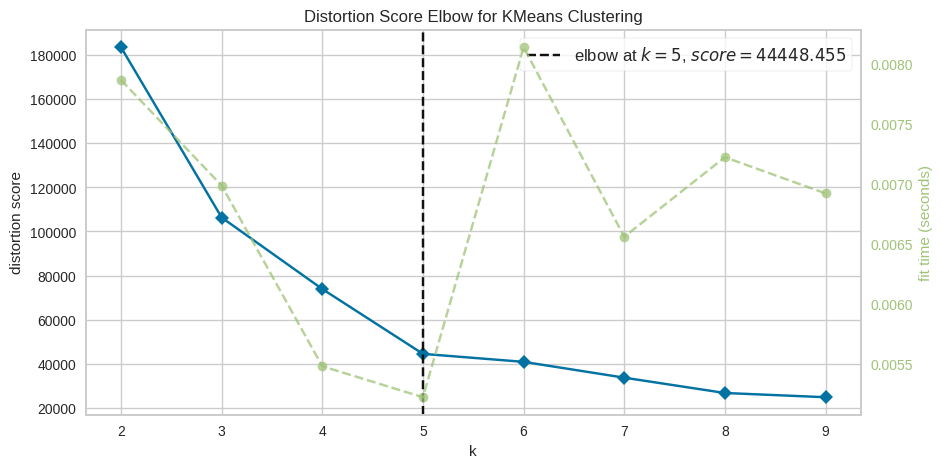

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
#instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

plt.figure(figsize=(10,5))
plt.title('The Elbow Method')
visualizer.fit(x)   #....fit the data to the visualizer
visualizer.show()   #....finalize and render the figure


In [ ]:
#initialize our model
from sklearn.cluster import KMeans
k_model = KMeans(n_clusters=5, init = 'k-means++', n_init=10, max_iter= 100)
k_model

KMeans(max_iter=100, n_clusters=5, n_init=10)

In [ ]:
pred_cluster = k_model.fit_predict(x)
x['Cluster'] = pred_cluster

x.head()

,Income,Score,Cluster
0,15,39,1
1,15,81,2
2,16,6,1
3,16,77,2
4,17,40,1


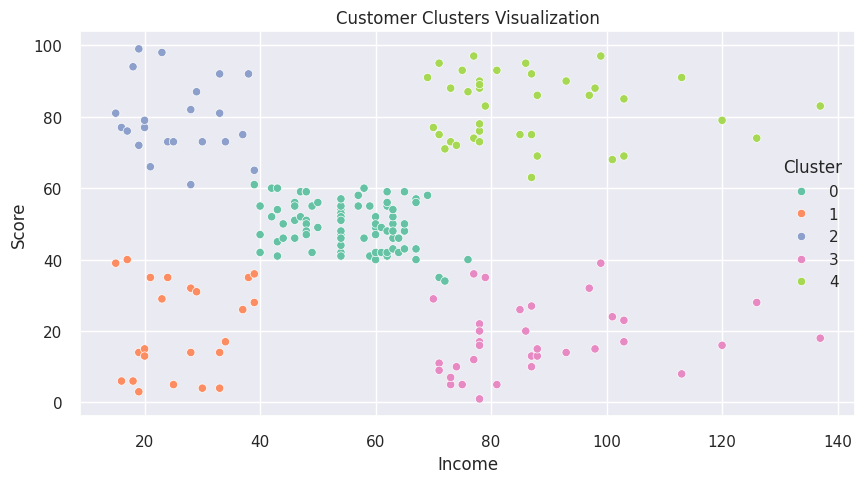

In [ ]:
sns.set(style = 'darkgrid')
plt.figure(figsize=(10,5))
sns.scatterplot(data = x, x='Income', y= 'Score', hue= 'Cluster', palette= 'Set2')
plt.title('Customer Clusters Visualization')
plt.show()

,Income,Score,Cluster,ClusterInterprete
0,15,39,1,MidIcome_MidSpending
1,15,81,2,LowIcome_HighSpending
2,16,6,1,MidIcome_MidSpending
3,16,77,2,LowIcome_HighSpending
4,17,40,1,MidIcome_MidSpending


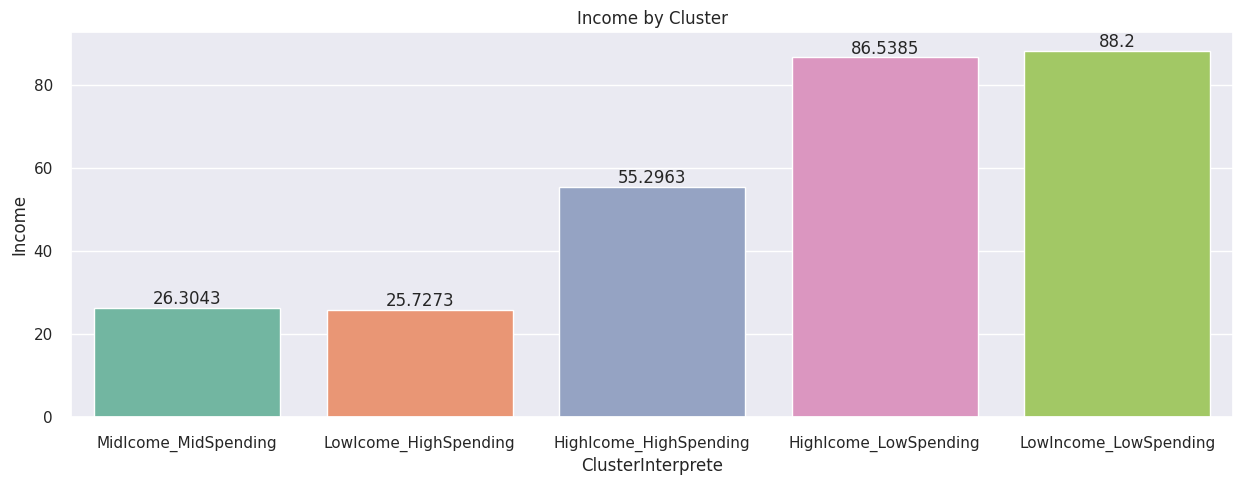

In [ ]:
#Renaming the clusters
x['ClusterInterprete'] = x.Cluster.map({0: 'HighIcome_HighSpending',
                                        1: 'MidIcome_MidSpending',
                                        2: 'LowIcome_HighSpending',
                                        3: 'LowIncome_LowSpending',
                                        4: 'HighIcome_LowSpending'})

display(x.head())
#creating a barplot
plt.figure(figsize = (15,5))
fig = sns.barplot(data = x, x = 'ClusterInterprete', y = 'Income', palette= 'Set2', ci = 0)

for i in fig.containers:
  fig.bar_label(i)

plt.title('Income by Cluster')
plt.show()

In [ ]:
#To extract loyal customers
x.loc[(x.ClusterInterprete == 'LowIcome_HighSpending') | (x.ClusterInterprete == 'HighIcome_HighSpending')].to_csv('LoyalCustomers.csv')


In [ ]:
#renaming ClusterInterprete to cluster
data['Cluster'] = x['ClusterInterprete']
data.head()

,Gender,Age,Income,Score,Cluster
0,Male,19,15,39,MidIcome_MidSpending
1,Male,21,15,81,LowIcome_HighSpending
2,Female,20,16,6,MidIcome_MidSpending
3,Female,23,16,77,LowIcome_HighSpending
4,Female,31,17,40,MidIcome_MidSpending


In [ ]:
#encoding the gender column to numerical
from sklearn.preprocessing import LabelEncoder
import joblib

encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])
joblib.dump(encoder, 'gender_encoder.pkl')
data.head()

,Gender,Age,Income,Score,Cluster
0,1,19,15,39,MidIcome_MidSpending
1,1,21,15,81,LowIcome_HighSpending
2,0,20,16,6,MidIcome_MidSpending
3,0,23,16,77,LowIcome_HighSpending
4,0,31,17,40,MidIcome_MidSpending


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = data.drop('Cluster', axis=1)
y = data.Cluster

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=90)
print(f'Xtrain shape: {xtrain.shape}')
print(f'Xtest shape: {xtest.shape}')
print(f'Ytrain shape: {ytrain.shape}')
print(f'Ytest shape: {ytest.shape}')

Xtrain shape: (160, 4)
Xtest shape: (40, 4)
Ytrain shape: (160,)
Ytest shape: (40,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(xtrain, ytrain)
validate = model.predict(xtrain)

from sklearn.metrics import classification_report
print(classification_report(validate, ytrain))


                        precision    recall  f1-score   support

HighIcome_HighSpending       1.00      1.00      1.00        60
 HighIcome_LowSpending       1.00      1.00      1.00        33
 LowIcome_HighSpending       1.00      1.00      1.00        15
 LowIncome_LowSpending       1.00      1.00      1.00        33
  MidIcome_MidSpending       1.00      1.00      1.00        19

              accuracy                           1.00       160
             macro avg       1.00      1.00      1.00       160
          weighted avg       1.00      1.00      1.00       160



In [ ]:
test_pred = model.predict(xtest)
print(classification_report(test_pred, ytest))

                        precision    recall  f1-score   support

HighIcome_HighSpending       0.90      1.00      0.95        19
 HighIcome_LowSpending       1.00      0.86      0.92         7
 LowIcome_HighSpending       1.00      1.00      1.00         7
 LowIncome_LowSpending       1.00      0.67      0.80         3
  MidIcome_MidSpending       1.00      1.00      1.00         4

              accuracy                           0.95        40
             macro avg       0.98      0.90      0.93        40
          weighted avg       0.95      0.95      0.95        40



In [ ]:
#testing the model
model.predict([[0, 20, 16, 6]])

array(['MidIcome_MidSpending'], dtype=object)